# Paper Figures

This notebook generates the figures of the paper

## Effect Size Maps for 3T, 7T and 3T-all

This figure consists of the Cohen's D maps for the 7T, 3T and 3T-all dataset

In [4]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

def save_nifti(np_img, affine, fname):
    outdir = '../../output/'
    nifti = nib.Nifti1Image(np_img,affine)
    nib.save(nifti, outdir+fname)

Generate the color gradient. We can import that directly from fsleyes, or use a gradient editor like this one: https://eltos.github.io/gradient/#0:A5B7FF-20.9:0025B3-50:000000-80:C73203-100:FC9298

Alternatively, here I load the colormap from fsleyes colormap directly

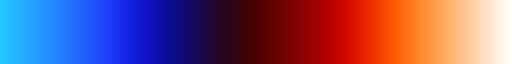

In [5]:
import matplotlib.colors as colors

cmap_txt = np.loadtxt('../../source_data/fsleyes_colormaps/flow.cmap')
flow_cmap = colors.ListedColormap(cmap_txt, 'flow')
flow_cmap

#### Load the Cohen's D Maps - These are generated in the `voxelwise_analysis.ipynb` notebook

In [6]:
right_tle_7t = nib.load('../../output/cohensd_maps_2023//cohend_7t_Right_tle2.nii.gz').get_fdata()
left_tle_7t = nib.load('../../output/cohensd_maps_2023/cohend_7t_Left_tle2.nii.gz').get_fdata()

In [7]:
def plot_4views(image, fname):
    plt.figure(figsize=(20,5))
    plt.subplot(141)
    plt.imshow(np.rot90(image[49,:,:]),vmin=-1, vmax=1, cmap=flow_cmap)
    plt.axis('off')

    plt.subplot(142)
    plt.imshow(np.fliplr(np.rot90(image[:,47,:])),vmin=-1, vmax=1, cmap=flow_cmap)
    plt.axis('off')

    plt.subplot(143)
    plt.imshow(np.fliplr(np.rot90(image[:,:,58])),vmin=-1, vmax=1, cmap=flow_cmap)
    plt.axis('off')

    plt.subplot(144)
    plt.imshow(np.fliplr(np.rot90(image[47,:,:])),vmin=-1, vmax=1, cmap=flow_cmap)
    plt.axis('off')
    plt.tight_layout()
    #plt.savefig('/Users/allucas/Documents/research/CNT/P18_7T_rsfMRI/output/figures/paper_figures/cohensd_maps_all/'+fname)

def plot_4views_smoothed(image, fname):
    plt.figure(figsize=(20,5))
    plt.subplot(141)
    plt.imshow(np.rot90(image[49,:,:]),vmin=-0.5, vmax=0.5, cmap=flow_cmap)
    plt.axis('off')

    plt.subplot(142)
    plt.imshow(np.fliplr(np.rot90(image[:,47,:])),vmin=-0.5, vmax=0.5, cmap=flow_cmap)
    plt.axis('off')

    plt.subplot(143)
    plt.imshow(np.fliplr(np.rot90(image[:,:,58])),vmin=-0.5, vmax=0.5, cmap=flow_cmap)
    plt.axis('off')

    plt.subplot(144)
    plt.imshow(np.fliplr(np.rot90(image[47,:,:])),vmin=-0.5, vmax=0.5, cmap=flow_cmap)
    plt.axis('off')
    plt.tight_layout()
    #plt.savefig('/Users/allucas/Documents/research/CNT/P18_7T_rsfMRI/output/figures/paper_figures/cohensd_maps_smoothed/'+fname)
    
    
def plot_4views_mprage(image, fname):
    image[image==0] = np.nan
    plt.figure(figsize=(20,5))
    plt.subplot(141)
    plt.imshow(np.rot90(image[49,:,:]), cmap='gray')
    plt.axis('off')

    plt.subplot(142)
    plt.imshow(np.fliplr(np.rot90(image[:,47,:])), cmap='gray')
    plt.axis('off')

    plt.subplot(143)
    plt.imshow(np.fliplr(np.rot90(image[:,:,58])), cmap='gray')
    plt.axis('off')

    plt.subplot(144)
    plt.imshow(np.fliplr(np.rot90(image[47,:,:])), cmap='gray')
    plt.axis('off')
    plt.tight_layout()
    #plt.savefig('/Users/allucas/Documents/research/CNT/P18_7T_rsfMRI/output/figures/paper_figures/cohensd_maps_all/'+fname)



#### 7T

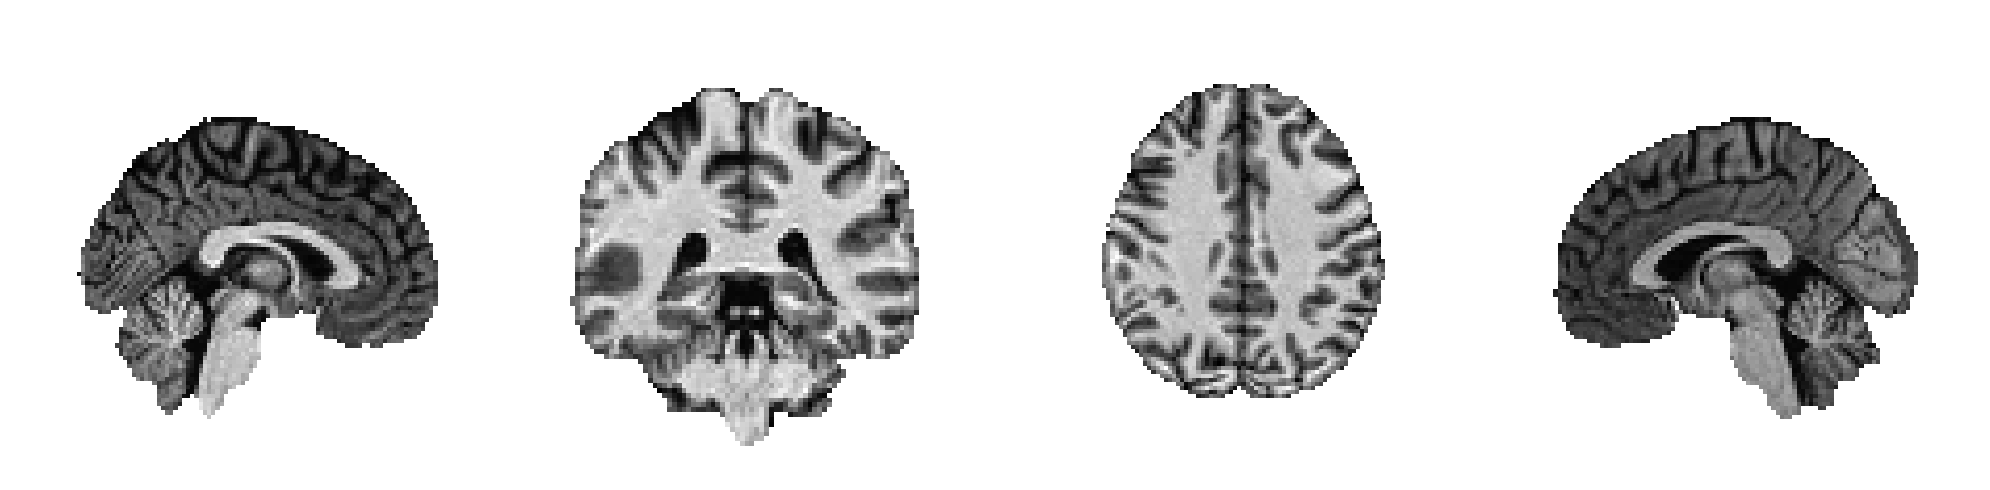

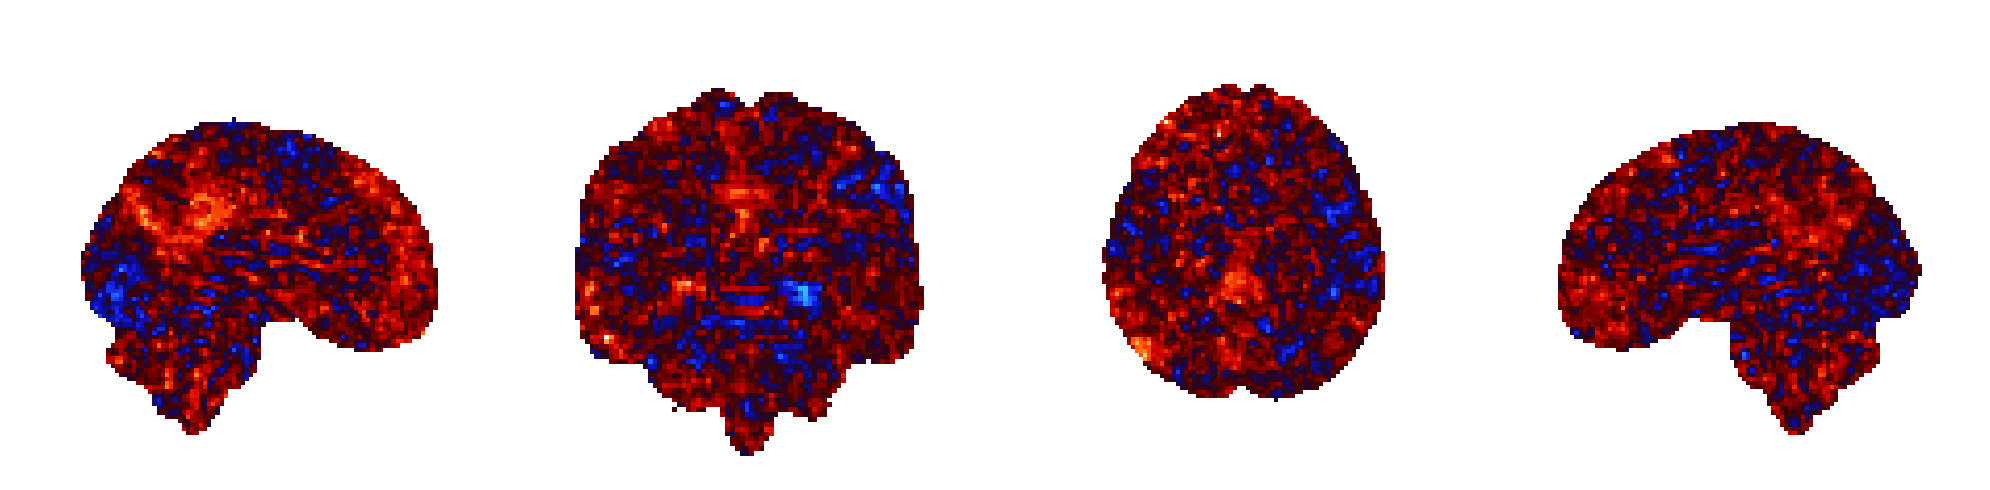

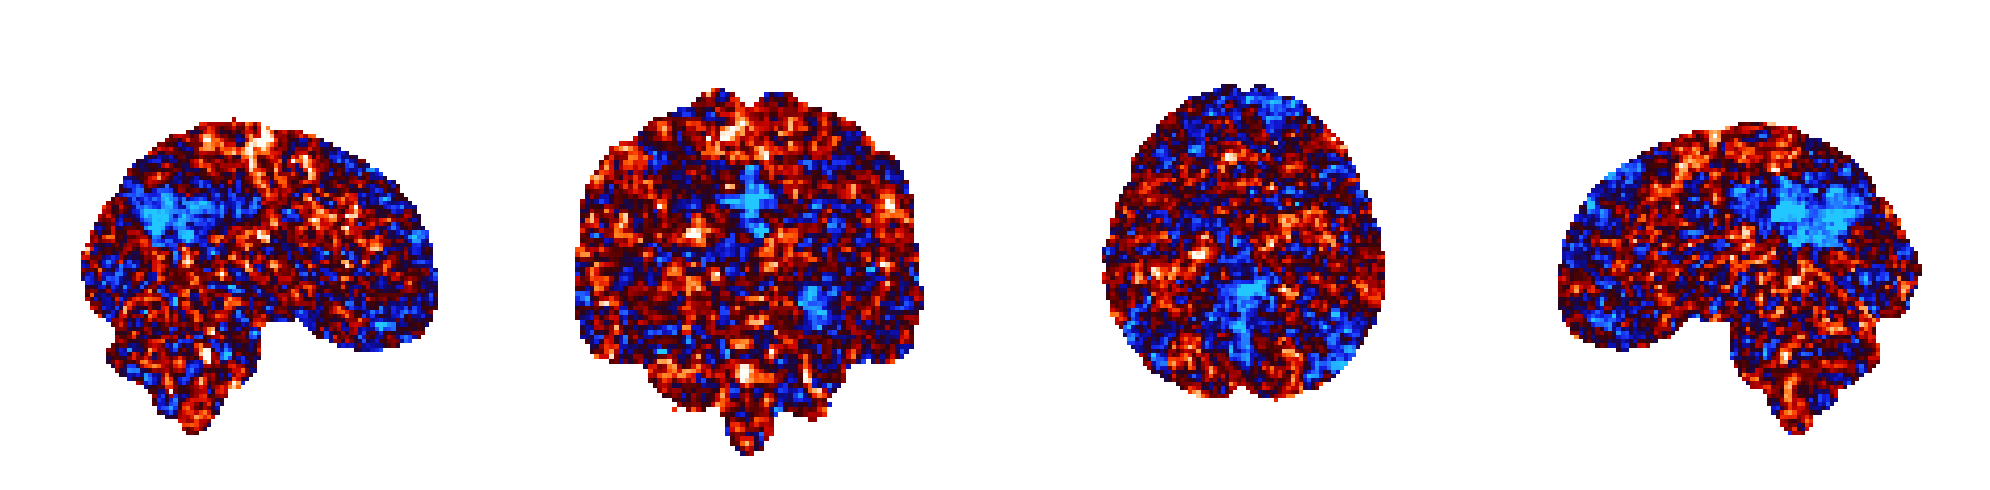

In [8]:
mprage_image = nib.load('../../source_data/sample_mp2rage/masked_mp2rage.nii.gz').get_fdata()
plot_4views_mprage(mprage_image,'mprage.pdf')
plot_4views(left_tle_7t,'left_tle_7t.pdf')
plot_4views(right_tle_7t,'right_tle_7t.pdf')

#### 7T - Smoothed

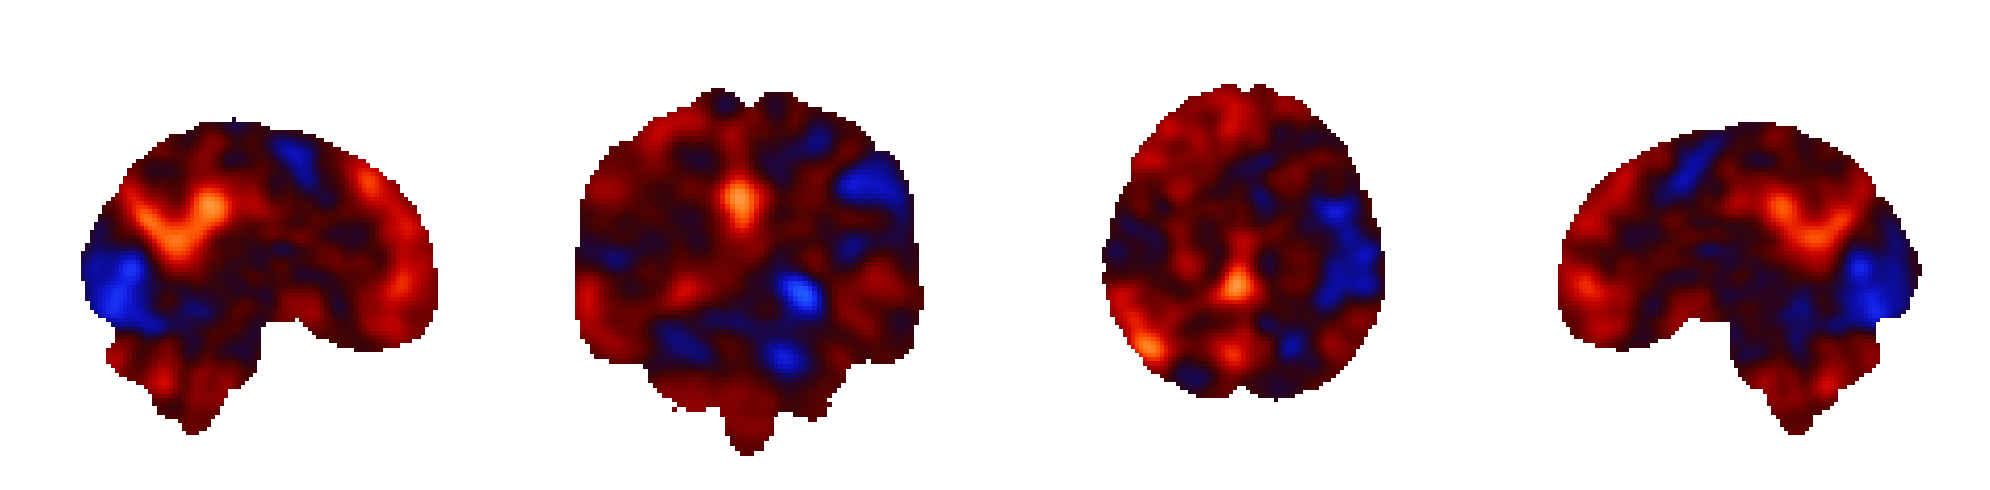

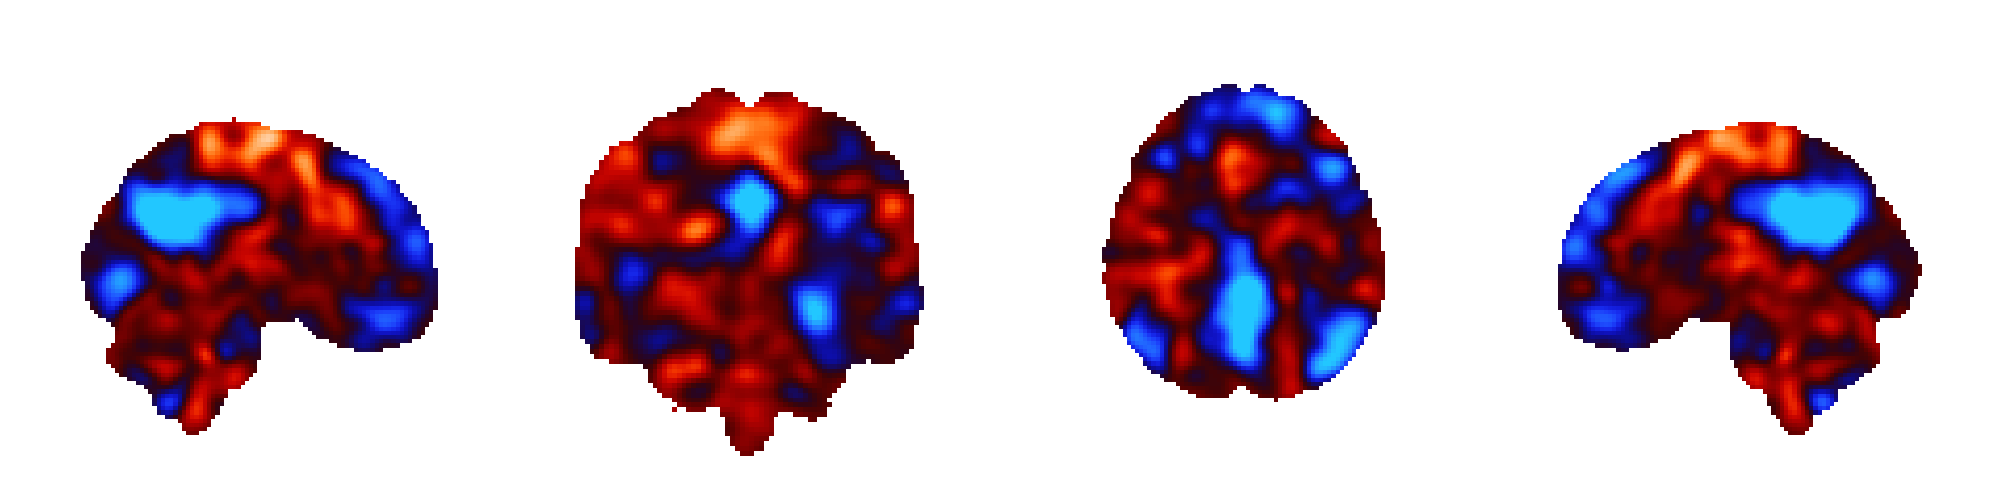

In [9]:
right_tle_7t_smoothed = nib.load('../../output/cohensd_maps_2023/cohend_7t_Right_tle_smoothed2.nii.gz').get_fdata()
left_tle_7t_smoothed = nib.load('../../output/cohensd_maps_2023/cohend_7t_Left_tle_smoothed2.nii.gz').get_fdata()
plot_4views_smoothed(left_tle_7t_smoothed,'left_tle_7t_smoothed.pdf')
plot_4views_smoothed(right_tle_7t_smoothed,'right_tle_7t_smoothed.pdf')

#### 3T

In [10]:
right_tle_3t = nib.load('../../output/cohensd_maps_2023/cohend_3t_Right_tle2.nii.gz').get_fdata()
left_tle_3t = nib.load('../../output/cohensd_maps_2023/cohend_3t_Left_tle2.nii.gz').get_fdata()

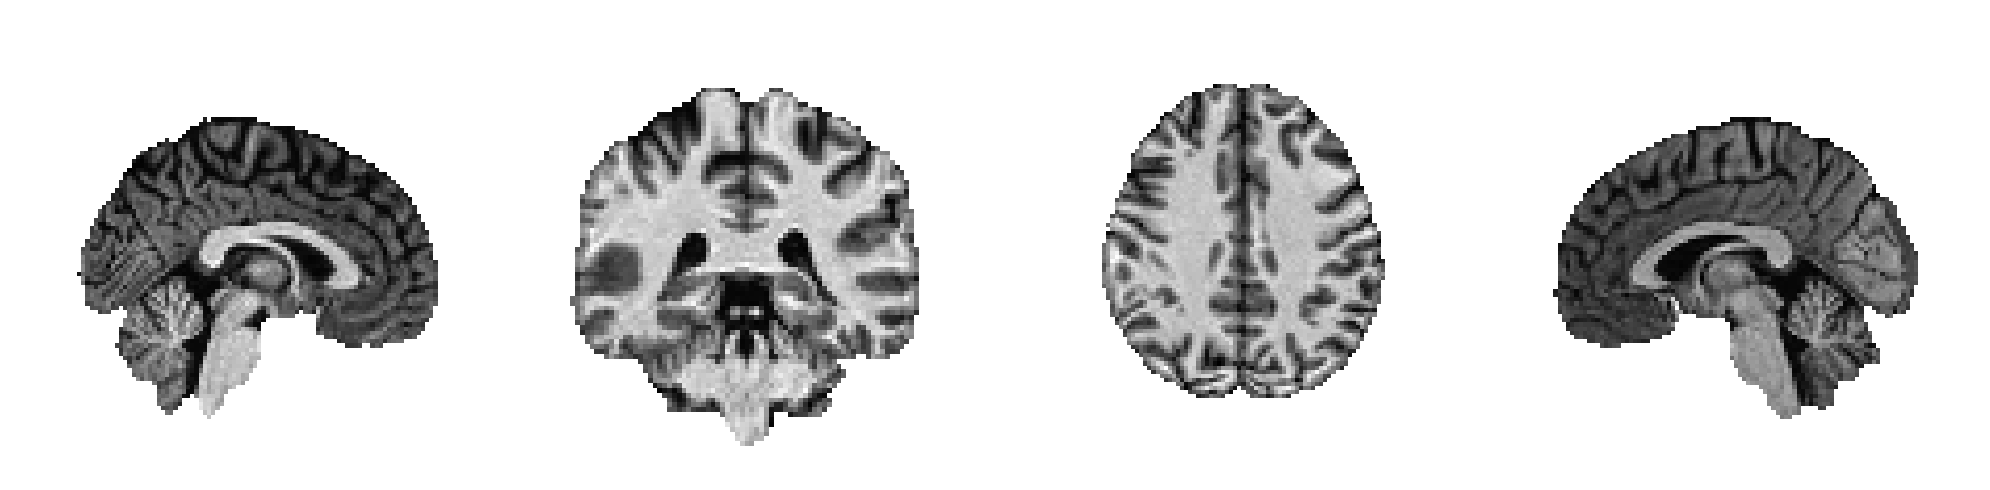

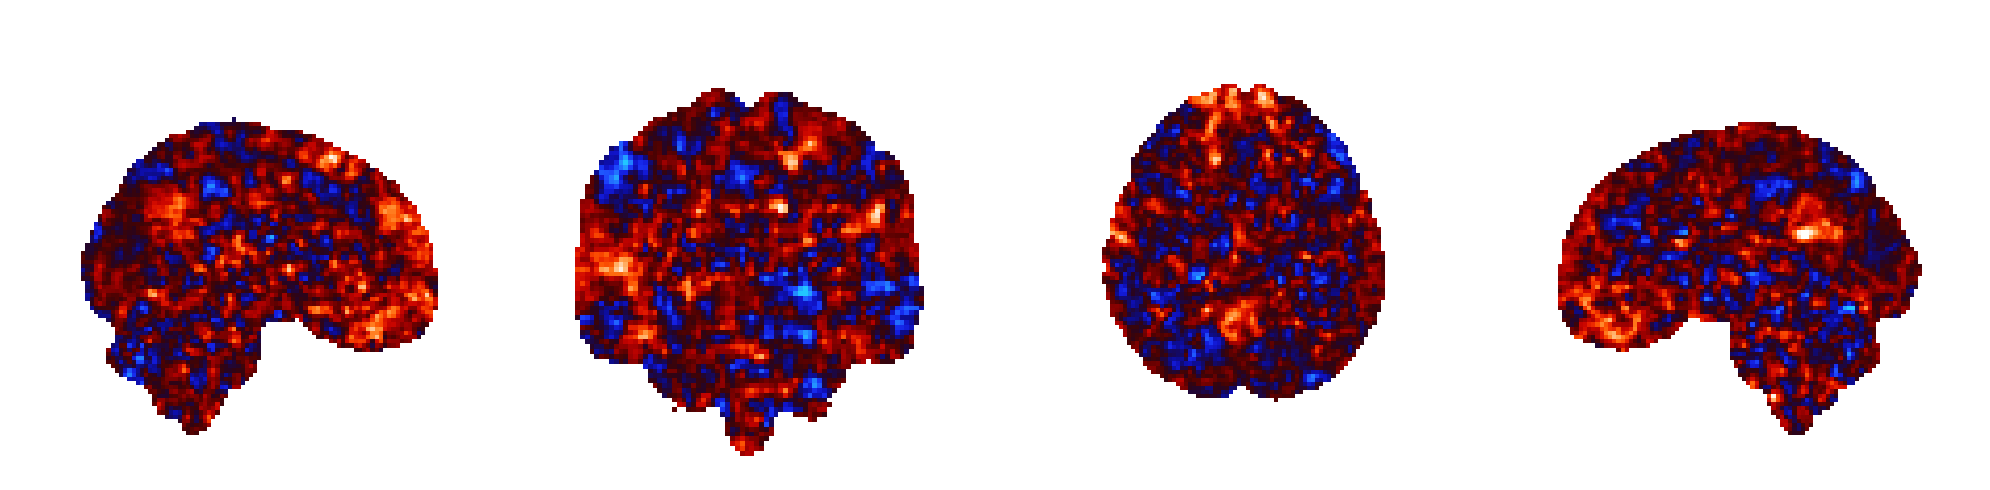

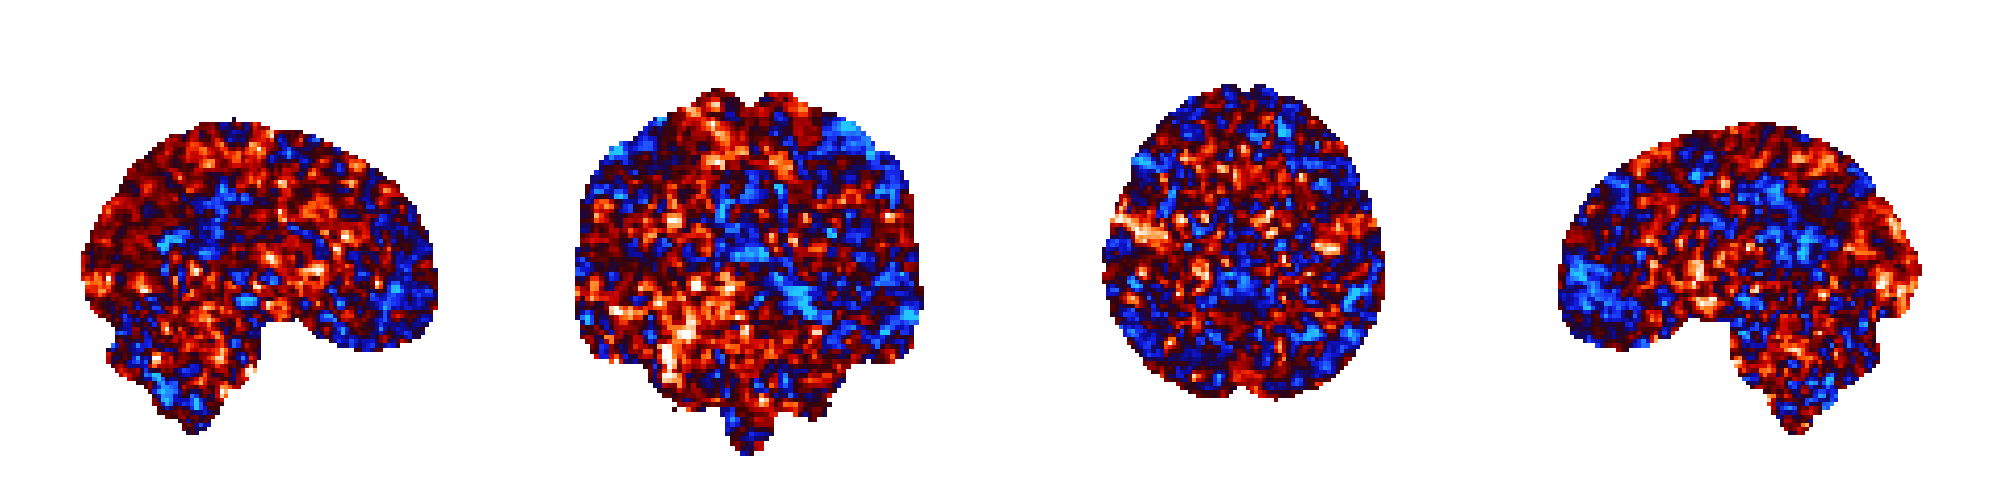

In [11]:
plot_4views_mprage(nib.load('../../source_data/sample_mp2rage/masked_mp2rage.nii.gz').get_fdata(), 'mprage.pdf')
plot_4views(left_tle_3t,'left_tle_3t.pdf')
plot_4views(right_tle_3t,'right_tle_3t.pdf')

#### 3T - Smoothed

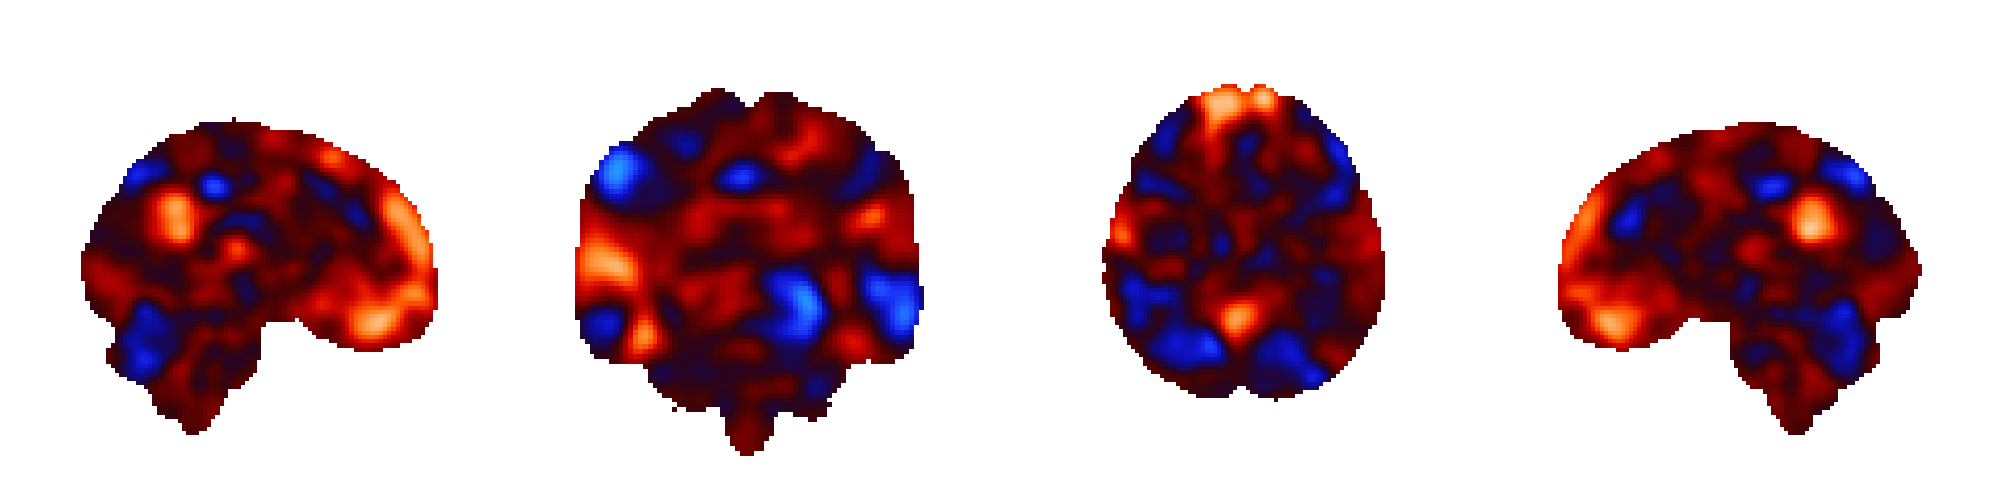

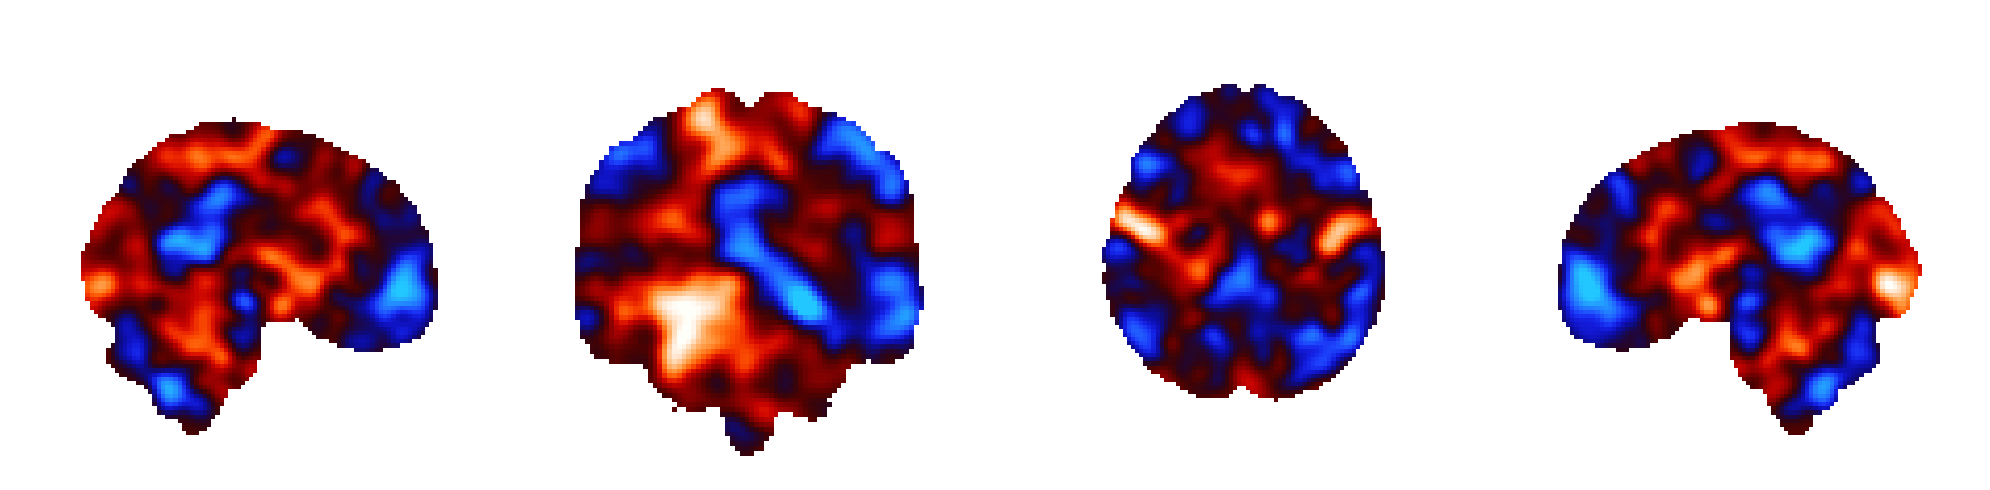

In [12]:
right_tle_3t_smoothed = nib.load('../../output/cohensd_maps_2023/cohend_3t_Right_tle_smoothed2.nii.gz').get_fdata()
left_tle_3t_smoothed = nib.load('../../output/cohensd_maps_2023/cohend_3t_Left_tle_smoothed2.nii.gz').get_fdata()
plot_4views_smoothed(left_tle_3t_smoothed,'left_tle_3t_smoothed.pdf')
plot_4views_smoothed(right_tle_3t_smoothed,'right_tle_3t_smoothed.pdf')

#### 3T-All

In [13]:
right_tle_3t_all = nib.load('../../output/cohend_3t_all_R_tle.nii.gz').get_fdata()
left_tle_3t_all = nib.load('../../output/cohend_3t_all_L_tle.nii.gz').get_fdata()

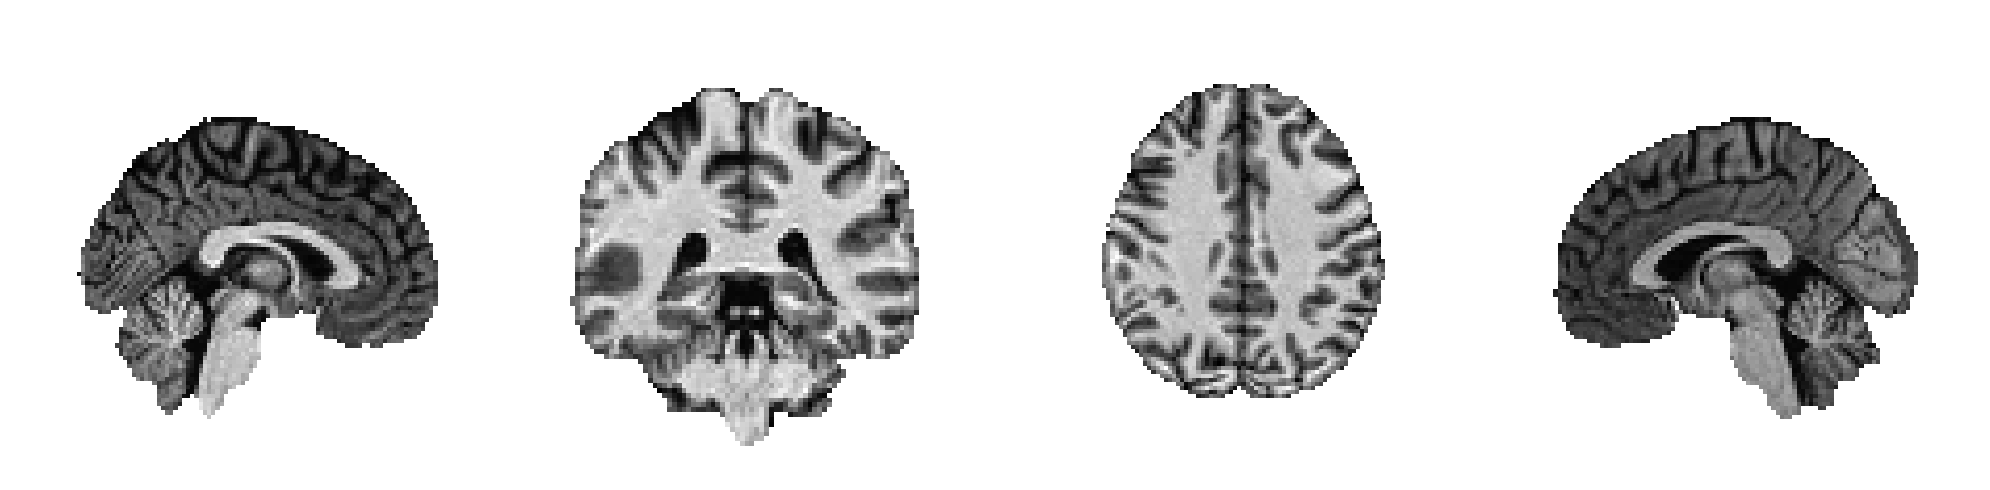

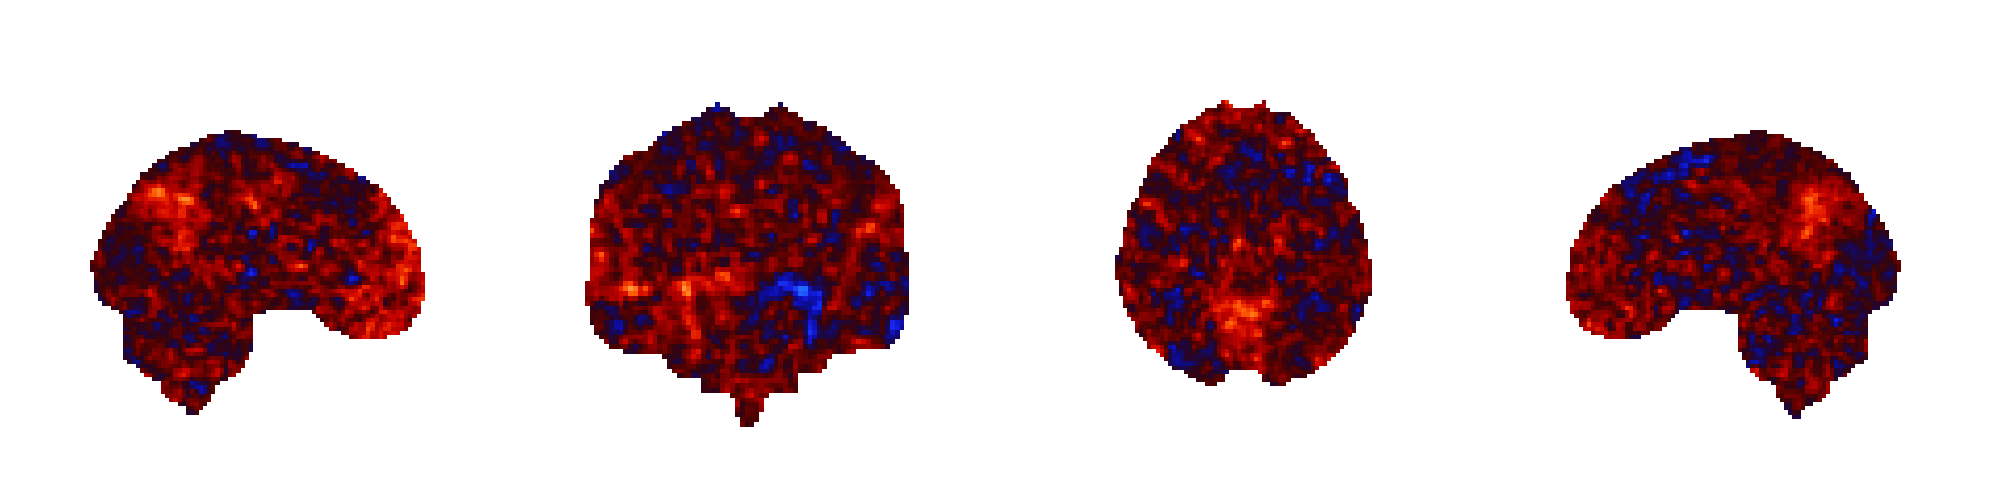

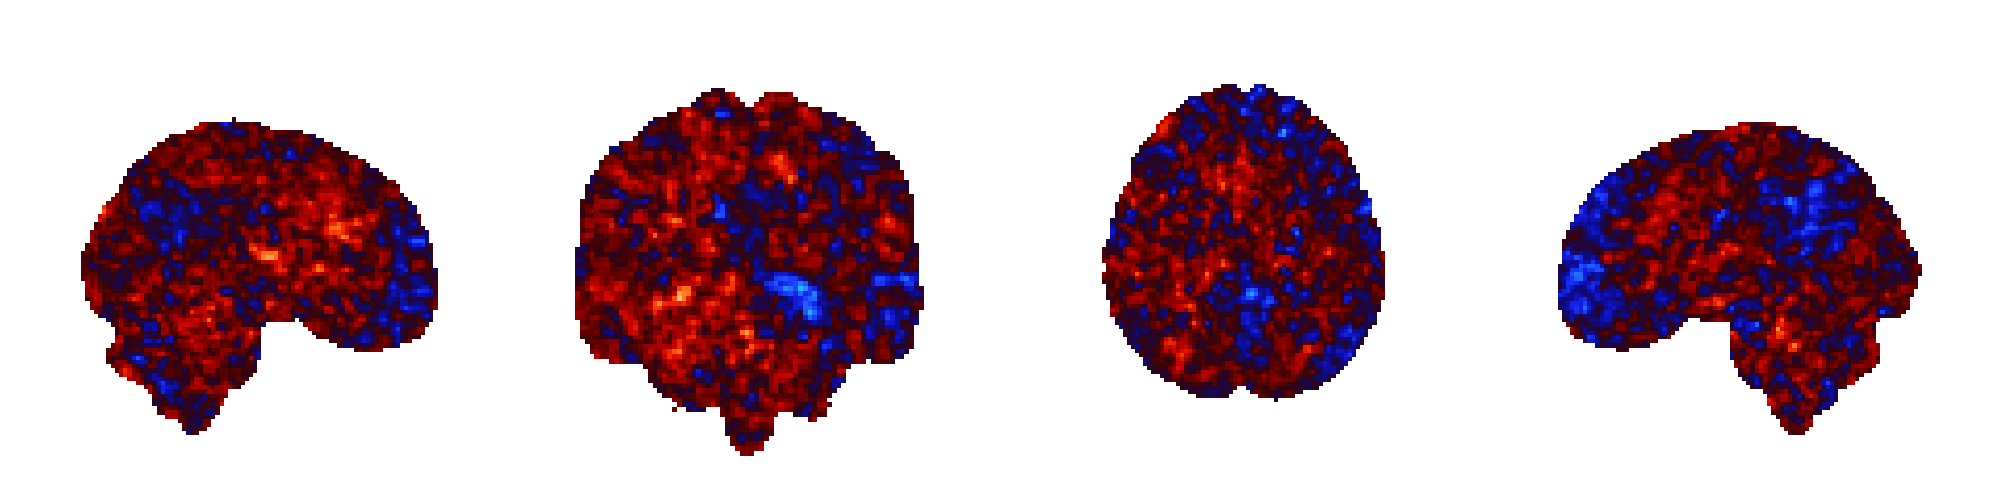

In [14]:
plot_4views_mprage(nib.load('../../source_data/sample_mp2rage/masked_mp2rage.nii.gz').get_fdata(), 'mprage.pdf')
plot_4views(left_tle_3t_all, 'left_tle_3t_all.pdf')
plot_4views(right_tle_3t_all, 'right_tle_3t_all.pdf')

#### 3T-all - Smoothed

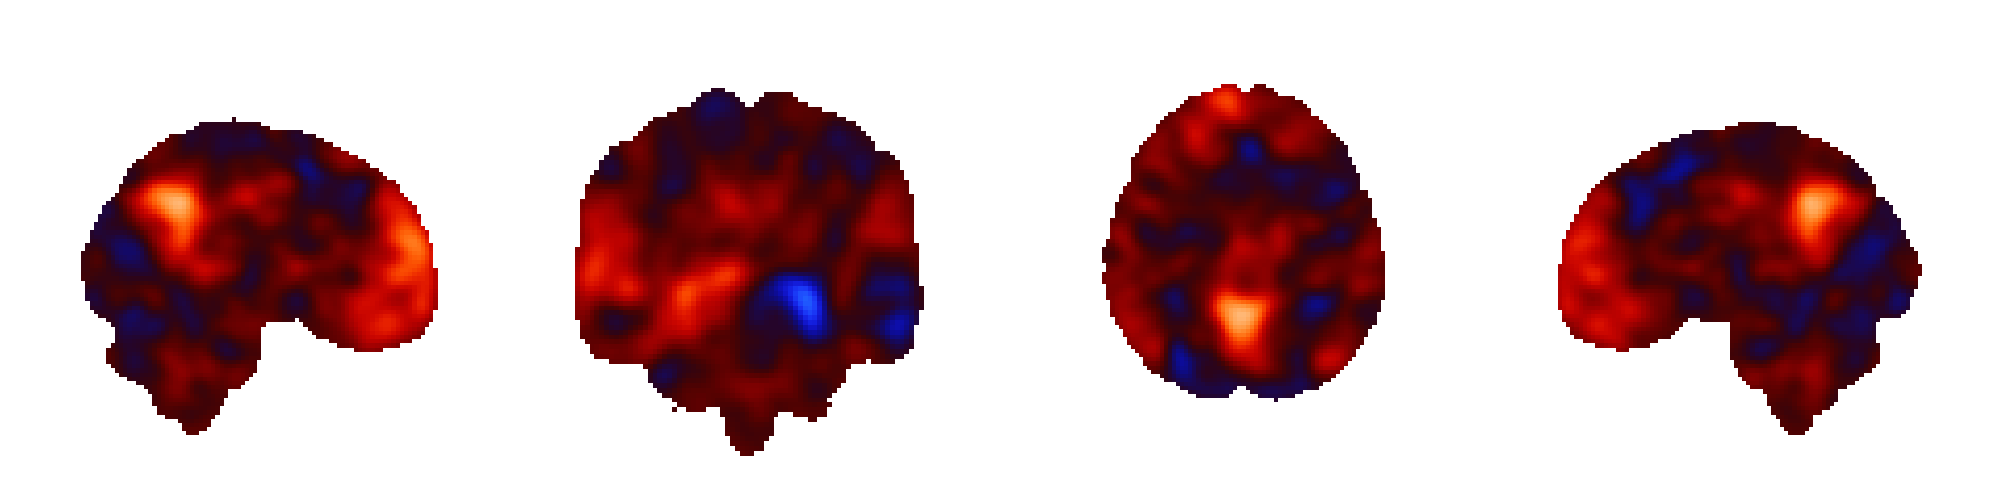

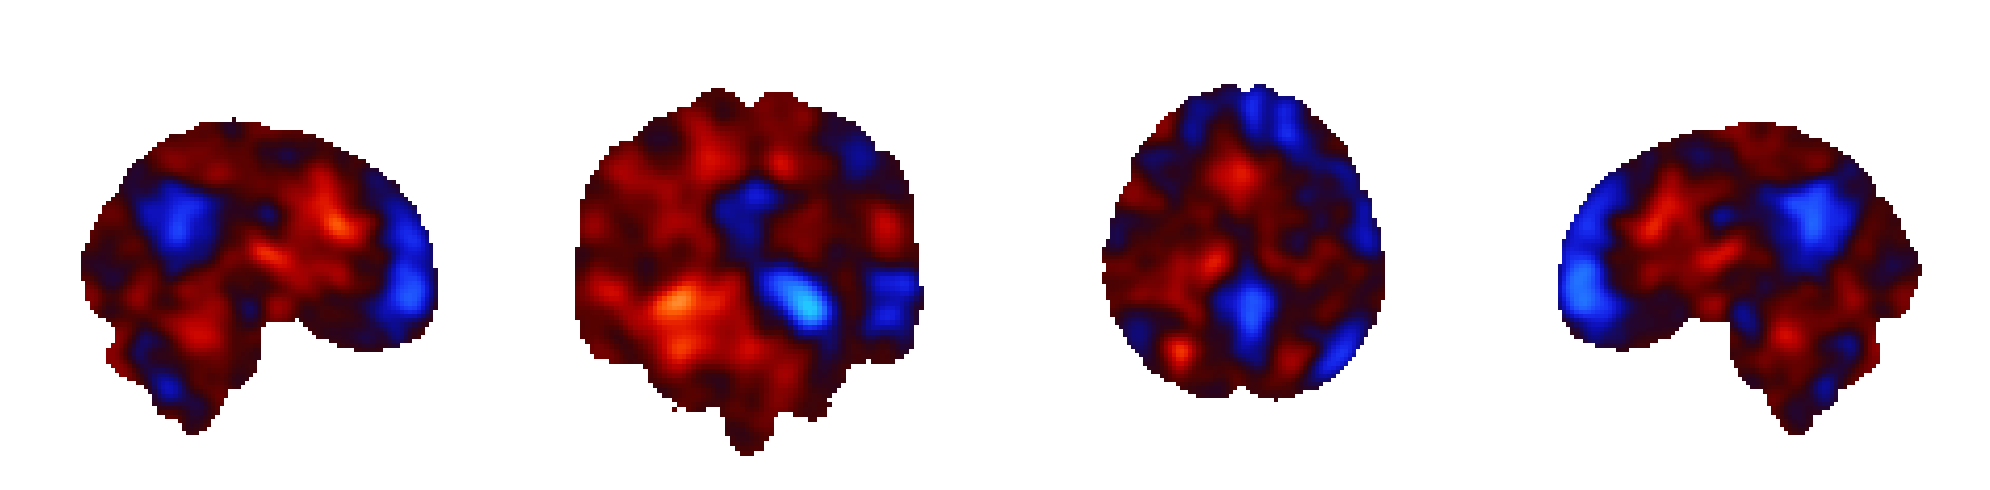

In [15]:
right_tle_3t_all_smoothed = nib.load('../../output/cohend_3t_all_R_tle_smoothed.nii.gz').get_fdata()
left_tle_3t_all_smoothed = nib.load('../../output/cohend_3t_all_L_tle_smoothed.nii.gz').get_fdata()
plot_4views_smoothed(left_tle_3t_all_smoothed,'left_tle_3t_all_smoothed.pdf')
plot_4views_smoothed(right_tle_3t_all_smoothed,'right_tle_3t_all_smoothed.pdf')

## Correlation of Smoothed Cohen's D Maps

In [19]:
# Define the DMN mask
sch = nib.load('../../source_data/modified_atlases/schaefer200x7_resliced_7T_fmri.nii').get_fdata()
communities = np.loadtxt('../../source_data/modified_atlases/schaefer200x7CommunityAffiliation.1D')

dmn_mask_left = np.zeros(sch.shape)
dmn_mask_right = np.zeros(sch.shape)


for i in range(len(communities)//2):
    if communities[i]==7:
        dmn_mask_left[sch==i+1] = 1 

for i in range(len(communities)//2):
    if communities[i+100]==7:
        dmn_mask_right[sch==i+100+1] = 1 

# Load the Harvard-Oxford atlas
HO = nib.load('../../../P4_high_freq_fmri/xcpEngine_atlases/atlas/HarvardOxford/HarvardOxfordMNI.nii').get_fdata()
        
# Define the mpfc
left_fp = (HO==10).astype(float) + (HO==30).astype(float)
left_fp[left_fp==0] = np.nan

right_fp = (HO==11).astype(float) + (HO==31).astype(float)
right_fp[right_fp==0] = np.nan

left_mdfc = dmn_mask_left*left_fp
right_mdfc = dmn_mask_right*right_fp

# Define th pcc
left_pcc = ((HO==300).astype(float) + (HO==310).astype(float))*dmn_mask_left
left_pcc[left_pcc==0] = np.nan

right_pcc = ((HO==301).astype(float)+ (HO==311).astype(float))*dmn_mask_right
right_pcc[right_pcc==0] = np.nan

In [21]:
vox_cohend_7t_l_tle = nib.load('../../output/cohensd_maps_2023/cohend_7t_Left_tle_smoothed.nii.gz').get_fdata()
vox_cohend_7t_r_tle = nib.load('../../output/cohensd_maps_2023/cohend_7t_Right_tle_smoothed.nii.gz').get_fdata()

vox_cohend_3t_l_tle = nib.load('../../output/cohensd_maps_2023/cohend_3t_Left_tle_smoothed.nii.gz').get_fdata()
vox_cohend_3t_r_tle = nib.load('../../output/cohensd_maps_2023/cohend_3t_Right_tle_smoothed.nii.gz').get_fdata()

vox_cohend_3t_all_l_tle = nib.load('../../output/cohend_3t_all_L_tle_smoothed.nii.gz').get_fdata()
vox_cohend_3t_all_r_tle = nib.load('../../output/cohend_3t_all_R_tle_smoothed.nii.gz').get_fdata()


In [89]:
print('Correlation Coefficient: ',stats.pearsonr(zero_nan(vox_cohend_7t_l_tle*left_pcc).ravel(), zero_nan(vox_cohend_3t_all_l_tle*left_pcc).ravel())[0])
print('p-value: ',stats.pearsonr(zero_nan(vox_cohend_7t_l_tle*left_pcc).ravel(), zero_nan(vox_cohend_3t_all_l_tle*left_pcc).ravel())[1])


#plt.scatter(zero_nan(vox_cohend_7t_l_tle*left_pcc).ravel(), zero_nan(vox_cohend_3t_all_l_tle*left_pcc).ravel(),alpha=0.5)

# df_scatter = pd.DataFrame()
# df_scatter['7T'] = zero_nan(vox_cohend_7t_l_tle*left_pcc).ravel()
# df_scatter['3T'] = zero_nan(vox_cohend_3t_all_l_tle*left_pcc).ravel()
# sns.lmplot(x='7T', y='3T', data=df_scatter, line_kws={'color': 'black'})

Correlation Coefficient:  0.5699854388600453
p-value:  0.0


In [90]:
print('Correlation Coefficient: ',stats.pearsonr(zero_nan(vox_cohend_7t_r_tle*right_pcc).ravel(), zero_nan(vox_cohend_3t_all_r_tle*right_pcc).ravel())[0])
print('p-value: ',stats.pearsonr(zero_nan(vox_cohend_7t_r_tle*right_pcc).ravel(), zero_nan(vox_cohend_3t_all_r_tle*right_pcc).ravel())[1])

#plt.scatter(zero_nan(vox_cohend_7t_l_tle*left_pcc).ravel(), zero_nan(vox_cohend_3t_all_l_tle*left_pcc).ravel(),alpha=0.5)

# df_scatter = pd.DataFrame()
# df_scatter['7T'] = zero_nan(vox_cohend_7t_r_tle*right_pcc).ravel()
# df_scatter['3T'] = zero_nan(vox_cohend_3t_all_r_tle*right_pcc).ravel()
# sns.lmplot(x='7T', y='3T', data=df_scatter, line_kws={'color': 'black'})

Correlation Coefficient:  0.877393692903702
p-value:  0.0


In [91]:
print('Correlation Coefficient: ',stats.pearsonr(zero_nan(vox_cohend_7t_r_tle*right_pcc).ravel(), zero_nan(vox_cohend_3t_r_tle*right_pcc).ravel())[0])
print('p-value: ',stats.pearsonr(zero_nan(vox_cohend_7t_r_tle*right_pcc).ravel(), zero_nan(vox_cohend_3t_r_tle*right_pcc).ravel())[1])

#plt.scatter(zero_nan(vox_cohend_7t_l_tle*left_pcc).ravel(), zero_nan(vox_cohend_3t_all_l_tle*left_pcc).ravel(),alpha=0.5)

# df_scatter = pd.DataFrame()
# df_scatter['7T'] = zero_nan(vox_cohend_7t_r_tle*right_pcc).ravel()
# df_scatter['3T'] = zero_nan(vox_cohend_3t_r_tle*right_pcc).ravel()
# sns.lmplot(x='7T', y='3T', data=df_scatter, line_kws={'color': 'black'})

Correlation Coefficient:  0.6411671057665244
p-value:  0.0


In [92]:
print('Correlation Coefficient: ',stats.pearsonr(zero_nan(vox_cohend_7t_l_tle*left_pcc).ravel(), zero_nan(vox_cohend_3t_l_tle*left_pcc).ravel())[0])
print('p-value: ',stats.pearsonr(zero_nan(vox_cohend_7t_l_tle*left_pcc).ravel(), zero_nan(vox_cohend_3t_l_tle*left_pcc).ravel())[1])

#plt.scatter(zero_nan(vox_cohend_7t_l_tle*left_pcc).ravel(), zero_nan(vox_cohend_3t_all_l_tle*left_pcc).ravel(),alpha=0.5)

# df_scatter = pd.DataFrame()
# df_scatter['7T'] = zero_nan(vox_cohend_7t_l_tle*left_pcc).ravel()
# df_scatter['3T'] = zero_nan(vox_cohend_3t_l_tle*left_pcc).ravel()
# sns.lmplot(x='7T', y='3T', data=df_scatter, line_kws={'color': 'black'})

Correlation Coefficient:  0.42679254087340096
p-value:  0.0


In [22]:
zero_nan(vox_cohend_7t_l_tle*left_pcc).ravel()

array([0., 0., 0., ..., 0., 0., 0.])

In [93]:
correlations_pcc = [
    stats.pearsonr(zero_nan(vox_cohend_7t_l_tle*left_pcc).ravel(), zero_nan(vox_cohend_3t_l_tle*left_pcc).ravel())[0],
    stats.pearsonr(zero_nan(vox_cohend_7t_l_tle*left_pcc).ravel(), zero_nan(vox_cohend_3t_all_l_tle*left_pcc).ravel())[0],
    stats.pearsonr(zero_nan(vox_cohend_7t_r_tle*right_pcc).ravel(), zero_nan(vox_cohend_3t_r_tle*right_pcc).ravel())[0],
    stats.pearsonr(zero_nan(vox_cohend_7t_r_tle*right_pcc).ravel(), zero_nan(vox_cohend_3t_all_r_tle*right_pcc).ravel())[0],

]

correlations_mdfc = [
    stats.pearsonr(zero_nan(vox_cohend_7t_l_tle*left_mdfc).ravel(), zero_nan(vox_cohend_3t_l_tle*left_mdfc).ravel())[0],
    stats.pearsonr(zero_nan(vox_cohend_7t_l_tle*left_mdfc).ravel(), zero_nan(vox_cohend_3t_all_l_tle*left_mdfc).ravel())[0],
    stats.pearsonr(zero_nan(vox_cohend_7t_r_tle*right_mdfc).ravel(), zero_nan(vox_cohend_3t_r_tle*right_mdfc).ravel())[0],
    stats.pearsonr(zero_nan(vox_cohend_7t_r_tle*right_mdfc).ravel(), zero_nan(vox_cohend_3t_all_r_tle*right_mdfc).ravel())[0],

]

correlations_whole_brain = [
    stats.pearsonr(zero_nan(vox_cohend_7t_l_tle).ravel(), zero_nan(vox_cohend_3t_l_tle).ravel())[0],
    stats.pearsonr(zero_nan(vox_cohend_7t_l_tle).ravel(), zero_nan(vox_cohend_3t_all_l_tle).ravel())[0],
    stats.pearsonr(zero_nan(vox_cohend_7t_r_tle).ravel(), zero_nan(vox_cohend_3t_r_tle).ravel())[0],
    stats.pearsonr(zero_nan(vox_cohend_7t_r_tle).ravel(), zero_nan(vox_cohend_3t_all_r_tle).ravel())[0],

]

In [94]:
import pandas as pd
df_corr = pd.DataFrame()
df_corr['Correlations PCC'] = correlations_pcc
df_corr['Correlations MPFC'] = correlations_mdfc
df_corr['Correlations Whole Brain'] = correlations_whole_brain
df_corr['Groups'] = ['7T/3T','7T/3T-all','7T/3T','7T/3T-all']

df_corr['Lat'] = ['Left TLE','Left TLE','Right TLE','Right TLE']

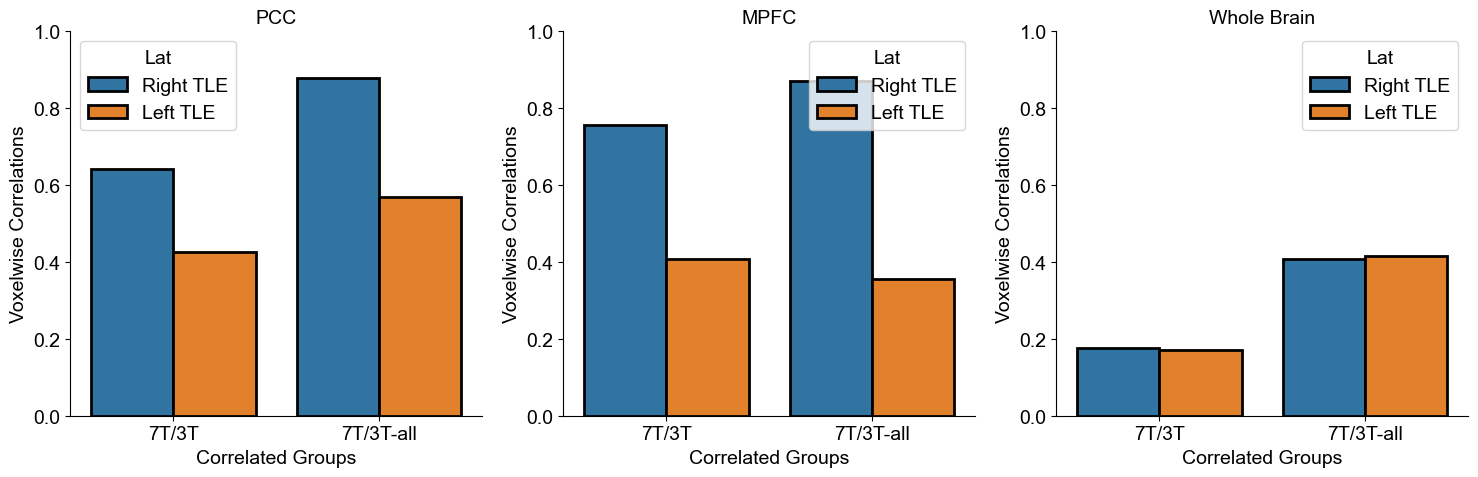

In [95]:
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.title('PCC')
sns.barplot(x='Groups', y='Correlations PCC', hue='Lat', data=df_corr, edgecolor='k', linewidth=2, hue_order=['Right TLE','Left TLE'])
plt.ylabel('Voxelwise Correlations')
plt.xlabel('Correlated Groups')
plt.ylim([0,1])

sns.despine()

plt.subplot(132)
plt.title('MPFC')
sns.barplot(x='Groups', y='Correlations MPFC', hue='Lat', data=df_corr, edgecolor='k', linewidth=2, hue_order=['Right TLE','Left TLE'])
plt.ylabel('Voxelwise Correlations')
plt.xlabel('Correlated Groups')
plt.ylim([0,1])

sns.despine()

plt.subplot(133)
plt.title('Whole Brain')
sns.barplot(x='Groups', y='Correlations Whole Brain', hue='Lat', data=df_corr, edgecolor='k', linewidth=2, hue_order=['Right TLE','Left TLE'])
plt.ylabel('Voxelwise Correlations')
plt.xlabel('Correlated Groups')
plt.ylim([0,1])
sns.despine()
plt.tight_layout()

#plt.savefig('/Users/allucas/Documents/research/CNT/P18_7T_rsfMRI/output/figures/paper_figures/updated_figures/correlations_updated.pdf')

## Cohen's D in the PCC

In [96]:
# Define the DMN mask
sch = nib.load('../../source_data/modified_atlases/schaefer200x7_resliced_7T_fmri.nii').get_fdata()
communities = np.loadtxt('../../source_data/modified_atlases/schaefer200x7CommunityAffiliation.1D')

dmn_mask_left = np.zeros(sch.shape)
dmn_mask_right = np.zeros(sch.shape)


for i in range(len(communities)//2):
    if communities[i]==7:
        dmn_mask_left[sch==i+1] = 1 

for i in range(len(communities)//2):
    if communities[i+100]==7:
        dmn_mask_right[sch==i+100+1] = 1 

In [97]:
HO = nib.load('../../../P4_high_freq_fmri/xcpEngine_atlases/atlas/HarvardOxford/HarvardOxfordMNI.nii').get_fdata()
left_pcc = ((HO==300).astype(float) + (HO==310).astype(float))*dmn_mask_left
left_pcc[left_pcc==0] = np.nan

right_pcc = ((HO==301).astype(float)+ (HO==311).astype(float))*dmn_mask_right
right_pcc[right_pcc==0] = np.nan

In [98]:
dist_7t_left = (left_pcc*left_tle_7t).ravel()
dist_3t_left = (left_pcc*left_tle_3t).ravel()
dist_3t_all_left = (left_pcc*left_tle_3t_all).ravel()


dist_7t_right = (right_pcc*right_tle_7t).ravel()
dist_3t_right = (right_pcc*right_tle_3t).ravel()
dist_3t_all_right = (right_pcc*right_tle_3t_all).ravel()

In [99]:
# Plotting Parameters
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE, family='Arial')          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

def plot_cohensd_dist(dist_7t, dist_3t, legend=['7T','3T'], title='temp.pdf'):
    plt.figure(figsize=(15,5))
    plt.subplot(131)
    #plt.figure(figsize=(5,5))
    plt.hist(dist_7t[dist_7t<-0.5], alpha=0.5,bins=40)
    plt.hist(dist_3t[dist_3t<-0.5],alpha=0.5, bins=40)
    plt.ylabel('Count')
    plt.xlabel('Cohen\'s D')
    #plt.legend(['7T','3T'])
    #plt.xlim([-1.5,1.5])
    #plt.vlines(x=0, ymin=0, ymax=120, color='k', linestyle='--')
    sns.despine()

    plt.subplot(132)
    plt.hist(dist_7t, alpha=0.5,bins=40, density=True)
    plt.hist(dist_3t,alpha=0.5, bins=40, density=True)
    plt.legend(legend)
    plt.xlim([-1.5,1.5])
    plt.ylabel('Density')
    plt.xlabel('Cohen\'s D')

    #plt.vlines(x=0, ymin=0, ymax=120, color='k', linestyle='--')
    sns.despine()

    plt.subplot(133)
    #plt.figure(figsize=(5,5))
    plt.hist(dist_7t[dist_7t>0.5], alpha=0.5,bins=40)
    plt.hist(dist_3t[dist_3t>0.5],alpha=0.5, bins=40)
    #plt.legend(['7T','3T'])
    #plt.xlim([-1.5,1.5])
    #plt.vlines(x=0, ymin=0, ymax=120, color='k', linestyle='--')
    plt.ylabel('Count')
    plt.xlabel('Cohen\'s D')
    sns.despine()
    #plt.savefig('/Users/allucas/Documents/research/CNT/P18_7T_rsfMRI/output/figures/paper_figures/histograms_updated/'+title)
def get_chi2_tails(dist_7t, dist_3t):
    a = np.nansum(dist_7t>0.5)
    b = np.nansum(dist_3t>0.5)
    c = np.nansum(dist_7t<-0.5)
    d = np.nansum(dist_3t<-0.5)
    
    obs = np.array([[a,b], [c,d]])
    print(obs)
    chi,p,dof,count = stats.chi2_contingency(obs)
    print('Chi2 p-value: ', p)

-0.4219906126186402


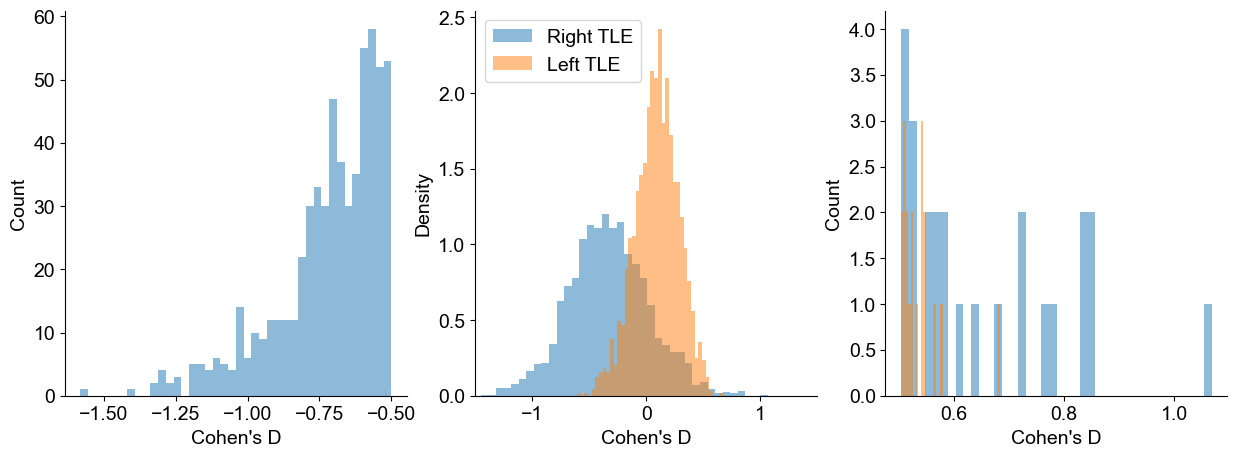

In [100]:
plot_cohensd_dist(nan_zero(dist_7t_right), nan_zero(dist_7t_left), legend=['Right TLE','Left TLE'], title='pcc_7t.pdf')
print(np.nanmean(nan_zero(dist_7t_right)) - np.nanmean(nan_zero(dist_7t_left)))

-0.20073888844698368


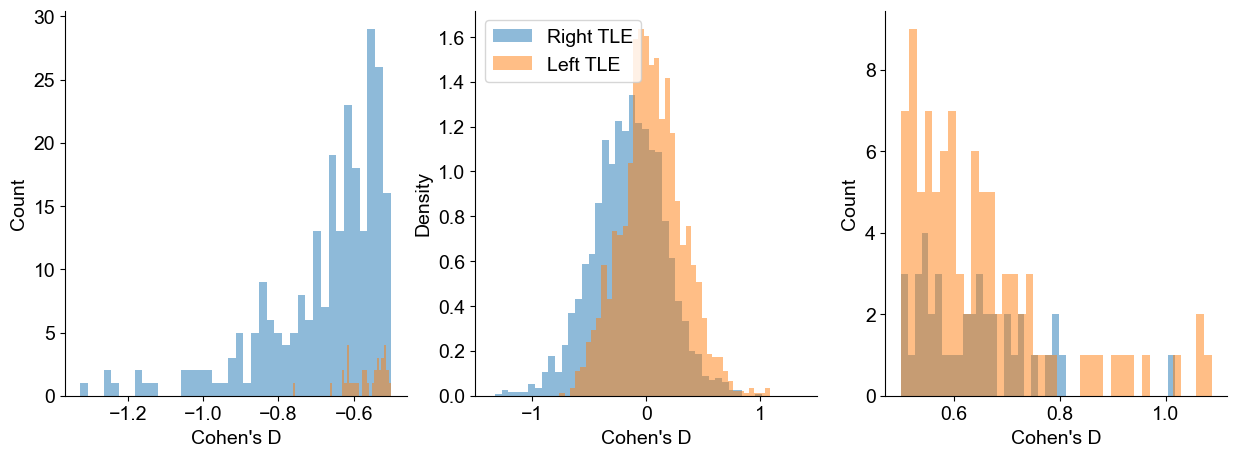

In [101]:
plot_cohensd_dist(nan_zero(dist_3t_right), nan_zero(dist_3t_left), legend=['Right TLE','Left TLE'],  title='pcc_3t.pdf')
print(np.nanmean(nan_zero(dist_3t_right)) - np.nanmean(nan_zero(dist_3t_left)))

-0.28807827521545193


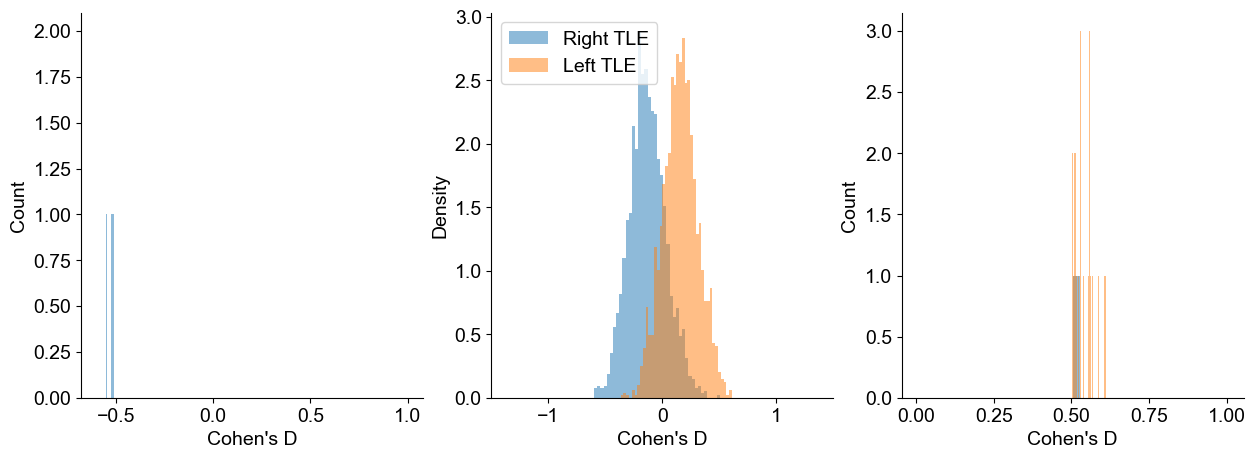

In [102]:
plot_cohensd_dist(nan_zero(dist_3t_all_right), nan_zero(dist_3t_all_left), legend=['Right TLE','Left TLE'],  title='pcc_3t_all.pdf')
print(np.nanmean(nan_zero(dist_3t_all_right)) - np.nanmean(nan_zero(dist_3t_all_left)))

In [103]:
print('3T-all vs. 7T')
print(stats.ttest_ind(zero_nan(dist_3t_all_left), zero_nan(dist_7t_left)))
print(stats.ttest_ind(zero_nan(dist_3t_all_right), zero_nan(dist_7t_right)))


3T-all vs. 7T
Ttest_indResult(statistic=9.503913749925648, pvalue=2.0234147413095657e-21)
Ttest_indResult(statistic=16.68742231856152, pvalue=1.6327402044642191e-62)


In [104]:
print('3T vs. 7T')
print(stats.ttest_ind(zero_nan(dist_3t_left), zero_nan(dist_7t_left)))
print(stats.ttest_ind(zero_nan(dist_3t_right), zero_nan(dist_7t_right)))


3T vs. 7T
Ttest_indResult(statistic=-5.3689028559992495, pvalue=7.922519693804872e-08)
Ttest_indResult(statistic=13.278343093759878, pvalue=3.1028423594778755e-40)


In [105]:
print('3T-all vs. 3T')
print(stats.ttest_ind(zero_nan(dist_3t_all_left), zero_nan(dist_3t_left)))
print(stats.ttest_ind(zero_nan(dist_3t_all_right), zero_nan(dist_3t_right)))


3T-all vs. 3T
Ttest_indResult(statistic=13.488220479205655, pvalue=1.8418625404878124e-41)
Ttest_indResult(statistic=2.0799695907588944, pvalue=0.03752843955462474)


In [106]:
get_chi2_tails(dist_7t_right, dist_3t_all_right)
get_chi2_tails(dist_7t_left, dist_3t_all_left)

[[ 25   1]
 [611  16]]
Chi2 p-value:  1.0
[[19 23]
 [ 2  0]]
Chi2 p-value:  0.42931817283634266


In [107]:
get_chi2_tails(dist_7t_right, dist_3t_right)
get_chi2_tails(dist_7t_left, dist_3t_left)

[[ 25  41]
 [611 252]]
Chi2 p-value:  6.301839880916407e-08
[[19 94]
 [ 2 36]]
Chi2 p-value:  0.13125182295642257


## Cohen's D in the MDFC

In [108]:
left_fp = (HO==10).astype(float) + (HO==30).astype(float)
left_fp[left_fp==0] = np.nan

right_fp = (HO==11).astype(float) + (HO==31).astype(float)
right_fp[right_fp==0] = np.nan

# Define the MDPFC
left_mdfc = dmn_mask_left*left_fp
right_mdfc = dmn_mask_right*right_fp

In [109]:
dist_7t_left = (left_mdfc*left_tle_7t).ravel()
dist_3t_left = (left_mdfc*left_tle_3t).ravel()
dist_3t_all_left = (left_mdfc*left_tle_3t_all).ravel()


dist_7t_right = (right_mdfc*right_tle_7t).ravel()
dist_3t_right = (right_mdfc*right_tle_3t).ravel()
dist_3t_all_right = (right_mdfc*right_tle_3t_all).ravel()

In [110]:
# Plotting Parameters
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE, family='Arial')          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

-0.22611166868422877


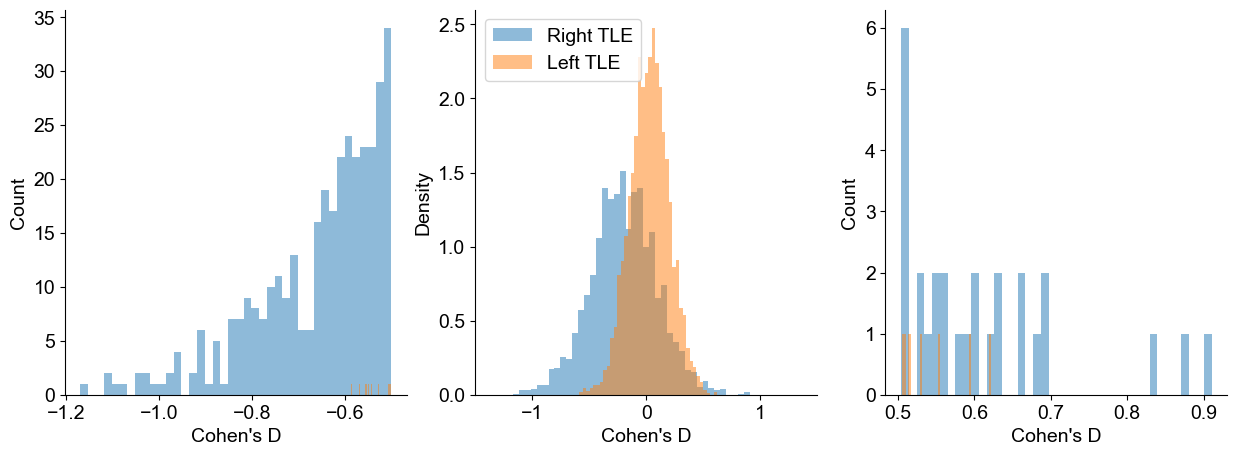

In [111]:
plot_cohensd_dist(nan_zero(dist_7t_right), nan_zero(dist_7t_left), legend=['Right TLE','Left TLE'], title='mdfc_7t.pdf')
print(np.nanmean(nan_zero(dist_7t_right)) - np.nanmean(nan_zero(dist_7t_left)))

-0.26624584375410915


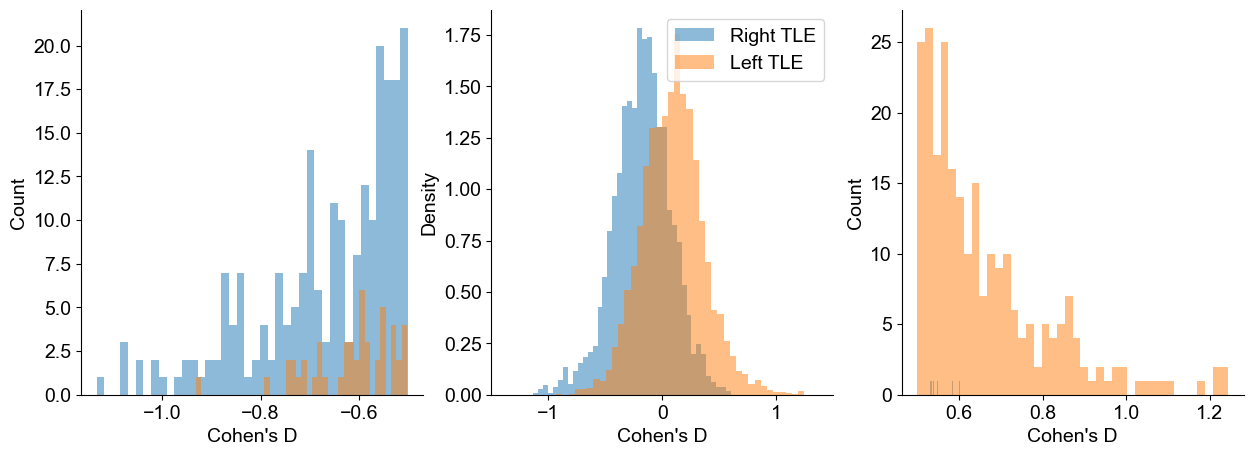

In [112]:
plot_cohensd_dist(nan_zero(dist_3t_right), nan_zero(dist_3t_left), legend=['Right TLE','Left TLE'], title='mdfc_3t.pdf')
print(np.nanmean(nan_zero(dist_3t_right)) - np.nanmean(nan_zero(dist_3t_left)))

-0.21482663360728374


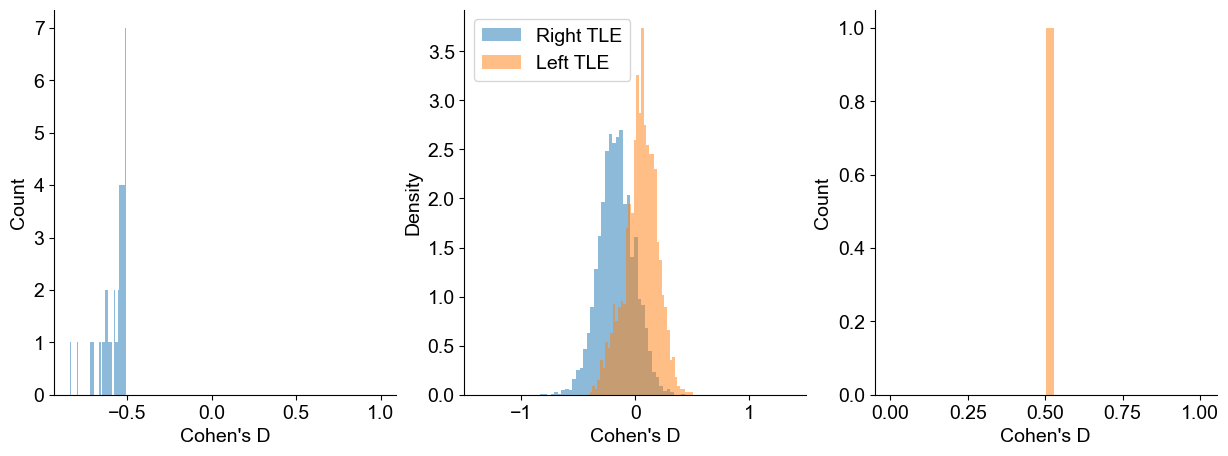

In [113]:
plot_cohensd_dist(nan_zero(dist_3t_all_right), nan_zero(dist_3t_all_left), legend=['Right TLE','Left TLE'], title='mdfc_3t_all.pdf')
print(np.nanmean(nan_zero(dist_3t_all_right)) - np.nanmean(nan_zero(dist_3t_all_left)))

In [64]:
print('3T-all vs. 7T')
print(stats.ttest_ind(zero_nan(dist_3t_all_left), zero_nan(dist_7t_left)))
print(stats.ttest_ind(zero_nan(dist_3t_all_right), zero_nan(dist_7t_right)))


3T-all vs. 7T
Ttest_indResult(statistic=-6.39435350923551, pvalue=1.6126068220882235e-10)
Ttest_indResult(statistic=4.726903162167146, pvalue=2.2798422141396742e-06)


In [65]:
print('3T vs. 7T')
print(stats.ttest_ind(zero_nan(dist_3t_left), zero_nan(dist_7t_left)))
print(stats.ttest_ind(zero_nan(dist_3t_right), zero_nan(dist_7t_right)))


3T vs. 7T
Ttest_indResult(statistic=-4.6995029920551685, pvalue=2.6081140600363807e-06)
Ttest_indResult(statistic=2.2514220194636825, pvalue=0.02435892067067553)


In [66]:
print('3T-all vs. 3T')
print(stats.ttest_ind(zero_nan(dist_3t_all_left), zero_nan(dist_3t_left)))
print(stats.ttest_ind(zero_nan(dist_3t_all_right), zero_nan(dist_3t_right)))


3T-all vs. 3T
Ttest_indResult(statistic=0.22200822350389157, pvalue=0.8243075025900507)
Ttest_indResult(statistic=2.2984640350402072, pvalue=0.02153548742068061)


In [67]:
print(stats.ttest_ind(zero_nan(dist_7t_left), zero_nan(dist_7t_right)))
print(stats.ttest_ind(zero_nan(dist_3t_left), zero_nan(dist_3t_right)))
print(stats.ttest_ind(zero_nan(dist_3t_all_left), zero_nan(dist_3t_all_right)))


Ttest_indResult(statistic=29.742445216062567, pvalue=2.377552716218183e-194)
Ttest_indResult(statistic=23.044965397043985, pvalue=1.7071525976230166e-117)
Ttest_indResult(statistic=38.65177365675505, pvalue=0.0)


In [68]:
get_chi2_tails(dist_7t_right, dist_3t_all_right)
get_chi2_tails(dist_7t_left, dist_3t_all_left)

[[ 33   0]
 [435  44]]
Chi2 p-value:  0.13361358868951403
[[76  1]
 [36  0]]
Chi2 p-value:  1.0


In [69]:
get_chi2_tails(dist_7t_right, dist_3t_right)
get_chi2_tails(dist_7t_left, dist_3t_left)

[[ 33  20]
 [435 307]]
Chi2 p-value:  0.707193859414874
[[ 76 136]
 [ 36 108]]
Chi2 p-value:  0.040633539653451685


## Cohen's D in the Lateral Occipital Cortex - Control Region

In [70]:
left_sma = (HO==220).astype(float) 
left_sma[left_sma==0] = np.nan

right_sma = (HO==221).astype(float)
right_sma[right_sma==0] = np.nan

In [71]:
dist_7t_left = (left_sma*left_tle_7t).ravel()
dist_3t_left = (left_sma*left_tle_3t).ravel()
dist_3t_all_left = (left_sma*left_tle_3t_all).ravel()


dist_7t_right = (right_sma*right_tle_7t).ravel()
dist_3t_right = (right_sma*right_tle_3t).ravel()
dist_3t_all_right = (right_sma*right_tle_3t_all).ravel()

In [72]:
# Plotting Parameters
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE, family='Arial')          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

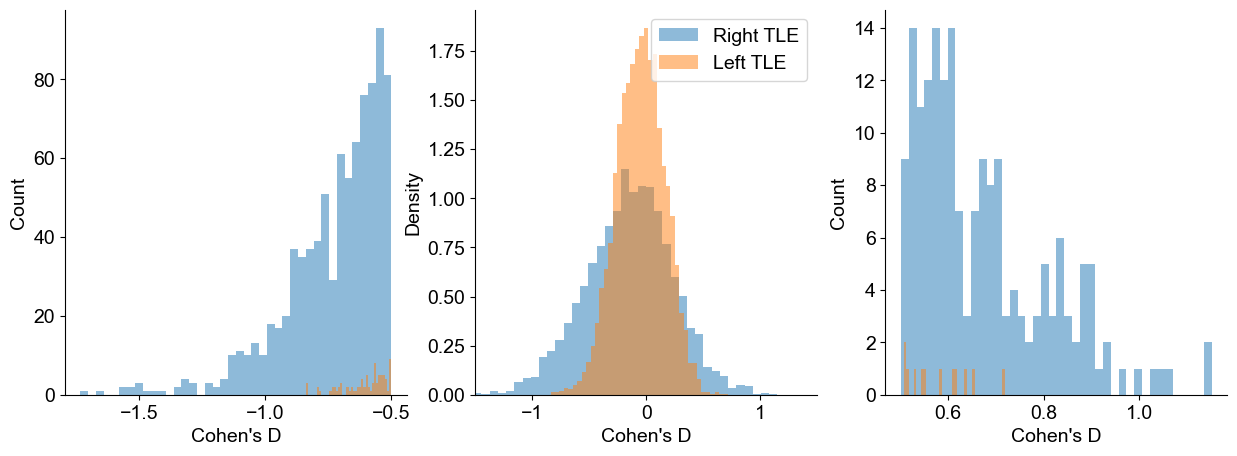

In [73]:
plot_cohensd_dist(nan_zero(dist_7t_right), nan_zero(dist_7t_left), legend=['Right TLE','Left TLE'])

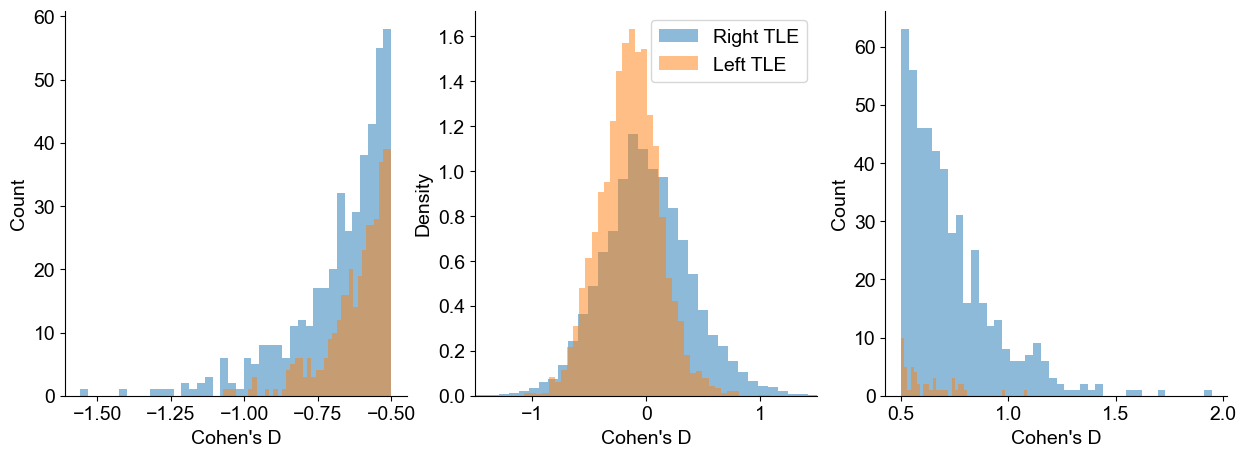

In [74]:
plot_cohensd_dist(nan_zero(dist_3t_right), nan_zero(dist_3t_left), legend=['Right TLE','Left TLE'])

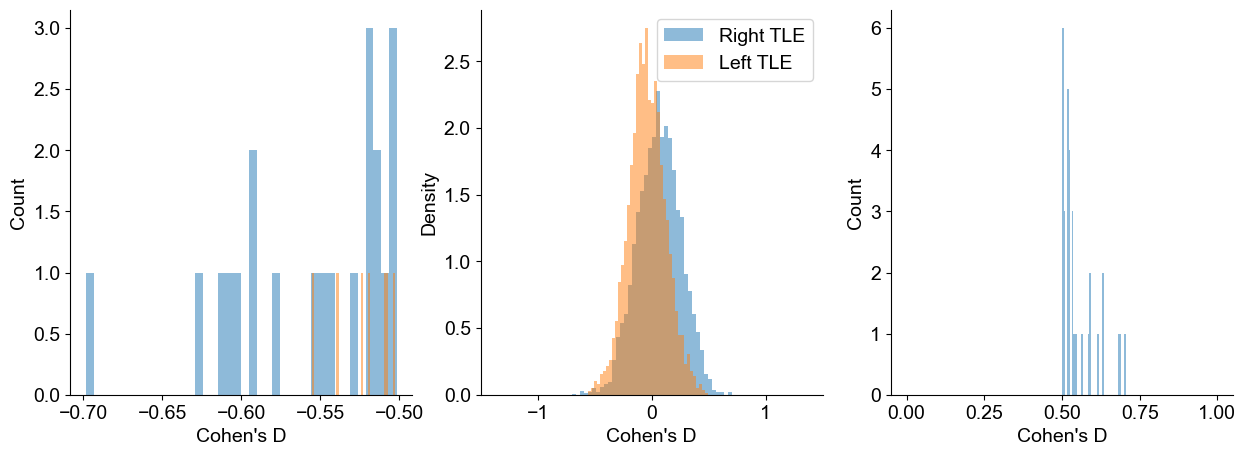

In [75]:
plot_cohensd_dist(nan_zero(dist_3t_all_right), nan_zero(dist_3t_all_left), legend=['Right TLE','Left TLE'])

In [76]:
print('3T-all vs. 7T')
print(stats.ttest_ind(zero_nan(dist_3t_all_left), zero_nan(dist_7t_left)))
print(stats.ttest_ind(zero_nan(dist_3t_all_right), zero_nan(dist_7t_right)))


3T-all vs. 7T
Ttest_indResult(statistic=7.400293250067018, pvalue=1.3593287435194037e-13)
Ttest_indResult(statistic=32.75748963185093, pvalue=2.71367218571239e-235)


In [77]:
print('3T vs. 7T')
print(stats.ttest_ind(zero_nan(dist_3t_left), zero_nan(dist_7t_left)))
print(stats.ttest_ind(zero_nan(dist_3t_right), zero_nan(dist_7t_right)))


3T vs. 7T
Ttest_indResult(statistic=-14.530243696007489, pvalue=7.834883940288163e-48)
Ttest_indResult(statistic=19.57771575473183, pvalue=2.4364403507586478e-85)


In [78]:
print('3T-all vs. 3T')
print(stats.ttest_ind(zero_nan(dist_3t_all_left), zero_nan(dist_3t_left)))
print(stats.ttest_ind(zero_nan(dist_3t_all_right), zero_nan(dist_3t_right)))


3T-all vs. 3T
Ttest_indResult(statistic=22.92434202316654, pvalue=2.743621061850789e-116)
Ttest_indResult(statistic=8.945924015473523, pvalue=3.691305698618111e-19)


In [79]:
print(stats.ttest_ind(zero_nan(dist_7t_left), zero_nan(dist_7t_right)))
print(stats.ttest_ind(zero_nan(dist_3t_left), zero_nan(dist_3t_right)))
print(stats.ttest_ind(zero_nan(dist_3t_all_left), zero_nan(dist_3t_all_right)))


Ttest_indResult(statistic=14.790460890945063, pvalue=1.6973824465046752e-49)
Ttest_indResult(statistic=-19.524401380591286, pvalue=6.926944712321804e-85)
Ttest_indResult(statistic=-26.134131451230765, pvalue=1.5760058838473751e-150)


In [684]:
get_chi2_tails(dist_7t_right, dist_3t_all_right)
get_chi2_tails(dist_7t_left, dist_3t_all_left)

[[201  44]
 [343  20]]
Chi2 p-value:  1.8279796651615088e-06
[[ 51   1]
 [140   4]]
Chi2 p-value:  1.0


In [685]:
get_chi2_tails(dist_7t_right, dist_3t_right)
get_chi2_tails(dist_7t_left, dist_3t_left)

[[201 229]
 [343 347]]
Chi2 p-value:  0.36577648929336337
[[ 51  24]
 [140 343]]
Chi2 p-value:  8.337047980846235e-11


## Plot the Masks used for the PCC and MDPC

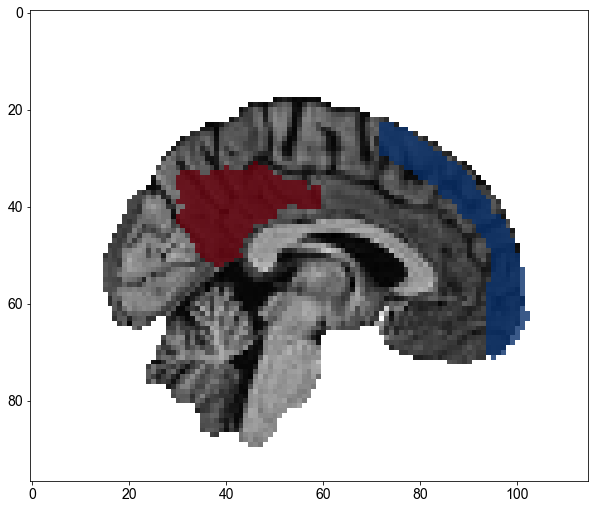

In [772]:
# plot the mask


plt.figure(figsize=(10,10))
plt.imshow(np.rot90(mprage_image[47,:,:]), cmap='gray')
plt.imshow(np.rot90(left_pcc[47,:,:]), cmap='Reds_r', alpha=0.8)
plt.imshow(np.rot90(left_mdfc[47,:,:]), cmap='Blues_r', alpha=0.8, vmin=1)
plt.savefig('pcc_mdpc_rois.pdf')